Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 2.28 

Model to predict the calls arriving at a call center\
Topics and relevant videos: [Poisson distribution](https://www.youtube.com/watch?v=WUPlNUYHpww), [maximum likelihood estimation](https://www.youtube.com/watch?v=P3u3chFBd1g), [empirical pmf](https://youtu.be/y3ITpptssr8?si=qniv0BI7lbziQV8y), [parametric and nonparametric models](https://www.youtube.com/watch?v=UrqtwPJEklw)

Author: Carlos Fernandez-Granda\
Data source: https://iew.technion.ac.il/serveng/callcenterdata/

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import poisson

year = 1999

base_url = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/call_center/"

# Load data
months = ["january","february","march","april","may","june","july","august","september","october","november","december"]
date = {}
time = {}
month_number = {}
for number, month in enumerate(months):
    # data = pd.read_csv ("../data/call_center/" + month + ".txt", sep='\s+')
    file_url = base_url + month + ".txt"
    data = pd.read_csv(file_url, sep='\s+')
    date[month] = data["date"]  
    time[month] = data["vru_entry"]
    month_number[month] = number + 1
hour = time["january"][0].split(":")[0]
hour = time["january"][14].split(":")[0]

In [10]:
def compute_counts(time_ini,time_end,month,verbose):
    counts = np.zeros(31)
    if verbose:
        print("Month: " + month)
    for index, time_call in enumerate(time[month]):
        if verbose:
            print("Date: " + str(date[month][index]) + " Time: " + time_call)
        day = int(date[month][index]) % 100
        hour = int(time_call.split(":")[0])
        if verbose:
            print("Date: " + str(date[month][index]) + " Time: " + time_call + " Day: " + str(day) + " Hour: " + str(hour) )
        if time_ini <= hour and hour < time_end:
            counts[day-1] += 1
            if verbose:
                print("count++")
    return counts
verbose = False
counts = compute_counts(9,10,"october",verbose)

In [11]:
time_ini = 6
time_end = 7
verbose = False
for month in months:
    counts = compute_counts(time_ini,time_end,month,verbose)
    if verbose:
        print(month)
        print(counts)
        print(sum(counts))

In [12]:
def is_weekend(month_number,day):
    date_object = datetime.date(year,month_number,day)
    weekday = date_object.weekday()
    return weekday == 5 or weekday == 6

Error of nonparametric estimate: 0.0201
Error of parametric estimate: 0.0223


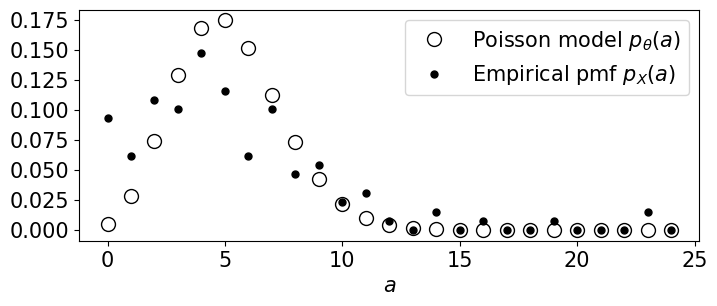

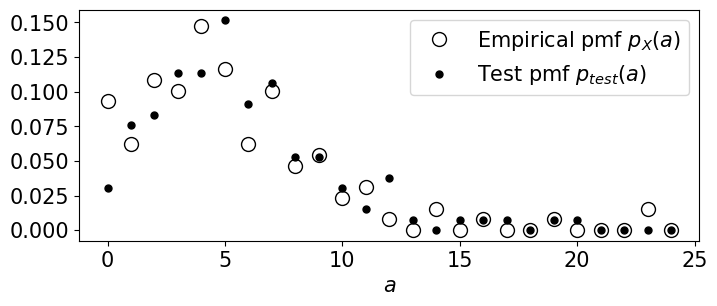

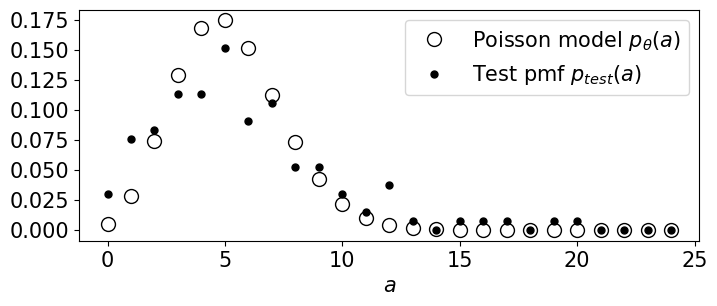

In [13]:
days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
def empirical_pmf(months, max_count,time_ini,time_end,verbose):
    count_vector = np.zeros(max_count)
    for month in months:
        if verbose:
            print("Month: " + month)
        verbose_counts = False
        counts = compute_counts(time_ini,time_end,month,verbose_counts)
        for index, count in enumerate(counts):
            day = index + 1
            if day <= days_in_month[month_number[month]-1]:
                weekend = is_weekend(month_number[month],day)
                if verbose:
                    print("Day " + str(day) + " Weekend: " + str(weekend))
                if not weekend:
                    count_vector[int(count)] += 1.
                    if verbose:
                        print("Count " + str(count) + " ++")
    pmf = count_vector / sum(count_vector)
    if verbose:
        print(count_vector)
        print(pmf)
    return pmf

def poisson_model(months, max_count,time_ini,time_end,verbose):
    average_aux = 0
    total = 0
    for month in months:
        if verbose:
            print("Month: " + month)
        verbose_counts = False
        counts = compute_counts(time_ini,time_end,month,verbose_counts)
        for index, count in enumerate(counts):
            day = index + 1
            if day <= days_in_month[month_number[month]-1]:
                weekend = is_weekend(month_number[month],day)
                if verbose:
                    print("Day " + str(day) + " Weekend: " + str(weekend))
                if not weekend: 
                    average_aux += count 
                    total += 1.
                    if verbose:
                        print("Count " + str(count) + " ++")
    lambda_param = average_aux / total
    if verbose:
        print("Poisson lambda parameter: " + print(lambda_param))
    pmf = poisson.pmf(np.arange(0,max_count,1), lambda_param)
    return pmf
    

training_months = ["january","february","march","april","may","june"]
test_months = ["july","august","september","october","november","december"]
time_ini = 6
time_end = 7
max_count = 25
verbose = False

empirical_pmf_train = empirical_pmf(training_months, max_count,time_ini,time_end,verbose)
poisson_fit = poisson_model(training_months, max_count,time_ini,time_end,verbose)
empirical_pmf_test = empirical_pmf(test_months, max_count,time_ini,time_end,verbose)

font_size = 15
font_size = 15
font_size_ticks = 15

plt.figure(figsize=(8,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(range(max_count),poisson_fit,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
     label=r'Poisson model $p_{\theta}(a)$')
plt.plot(range(max_count),empirical_pmf_train,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
     label=r'Empirical pmf $p_{X}(a)$')
plt.xlabel(r'$a$',fontsize=font_size)
plt.legend(fontsize=font_size)

plt.figure(figsize=(8,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(range(max_count),empirical_pmf_train,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
     label=r'Empirical pmf $p_{X}(a)$')
plt.plot(range(max_count),empirical_pmf_test,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
     label=r'Test pmf $p_{test}(a)$')
plt.xlabel(r'$a$',fontsize=font_size)
plt.legend(fontsize=font_size)

plt.figure(figsize=(8,3))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(range(max_count),poisson_fit,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
     label=r'Poisson model $p_{\theta}(a)$')
plt.plot(range(max_count),empirical_pmf_test,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
     label=r'Test pmf $p_{test}(a)$')
# plt.ylabel(r"$p_{X}(a)$",fontsize=font_size,labelpad = 10)
plt.xlabel(r'$a$',fontsize=font_size)
plt.legend(fontsize=font_size)

nonparametric_error = np.std(empirical_pmf_train - empirical_pmf_test)
parametric_error = np.std(poisson_fit - empirical_pmf_test)
print("Error of nonparametric estimate: {:0.4f}".format(nonparametric_error))
print("Error of parametric estimate: {:0.4f}".format(parametric_error))

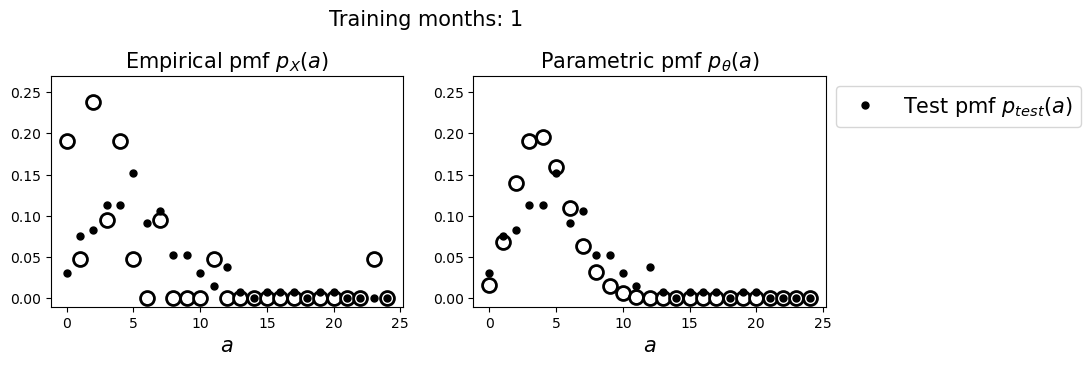

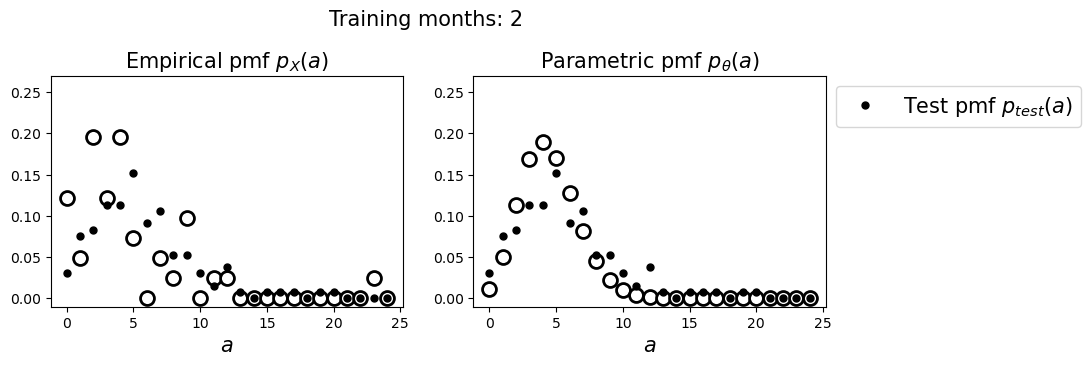

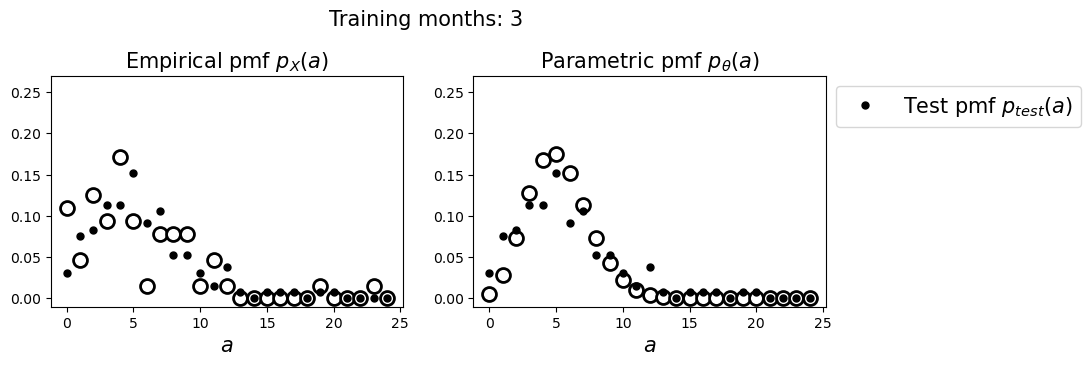

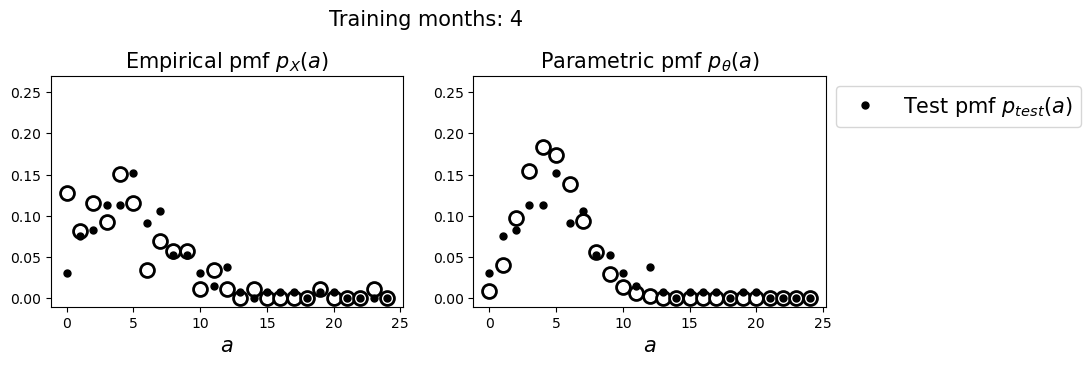

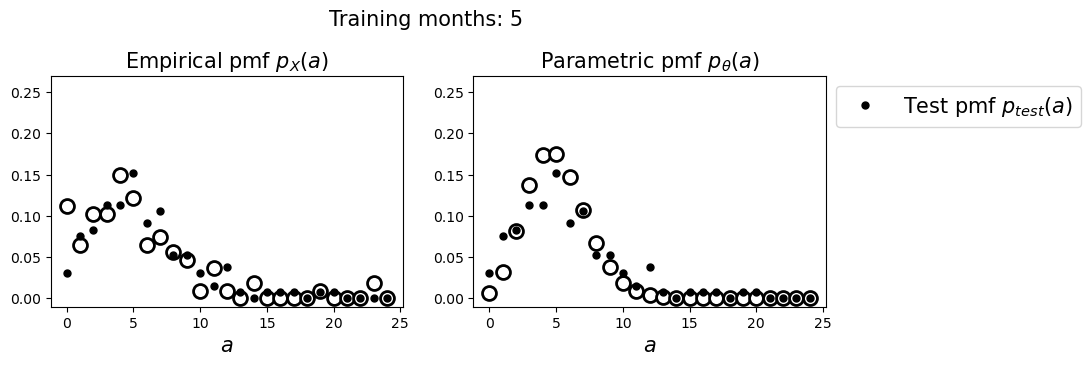

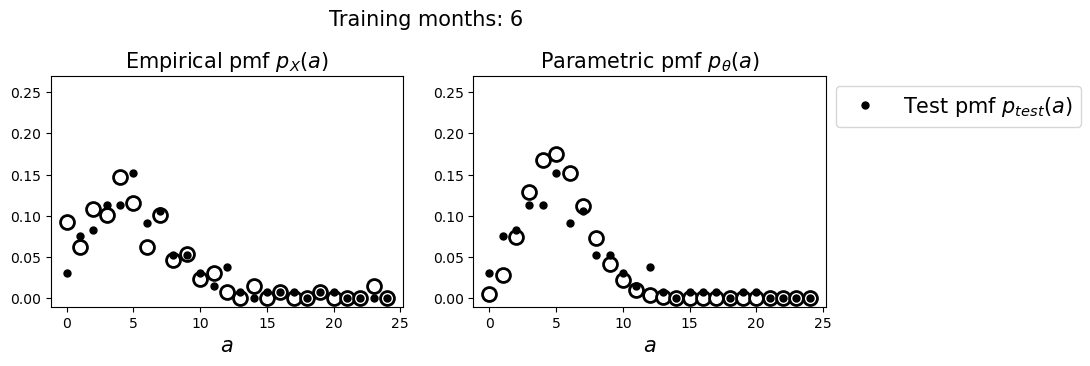

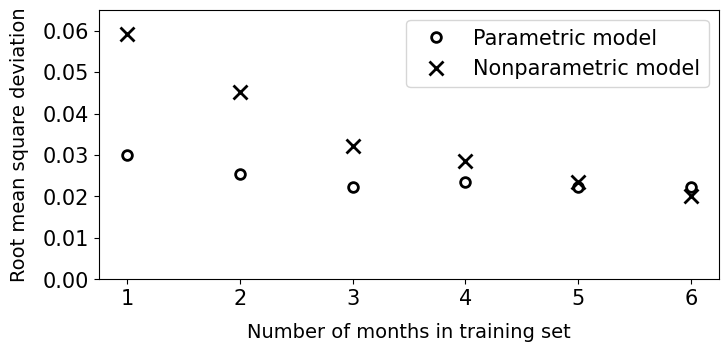

In [14]:
time_ini = 6
time_end = 7
max_count = 25
verbose = False 

nonparametric_errors = []
parametric_errors = []
m = len(training_months)
y_max = 0.27
medgewidth = 2
for month in np.arange(1,m+1):
    training_set = training_months[:month]
    # print("Training months: ")
    # print(training_set)
    empirical_pmf_train = empirical_pmf(training_set, max_count,time_ini,time_end,verbose)
    poisson_fit = poisson_model(training_set, max_count,time_ini,time_end,verbose)
    nonparametric_error = np.std(empirical_pmf_train - empirical_pmf_test)
    parametric_error = np.std(poisson_fit - empirical_pmf_test)
    nonparametric_errors.append(nonparametric_error)
    parametric_errors.append(parametric_error)
    # print("Error of nonparametric estimate: {:0.4f}".format(nonparametric_error))
    # print("Error of parametric estimate: {:0.4f}".format(parametric_error))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3),width_ratios=[1,1])
    fig.suptitle("Training months: " + str(month),fontsize=font_size,y = 1.1)

    ax1.plot(range(max_count),empirical_pmf_train,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
             markeredgewidth = medgewidth)
    ax1.plot(range(max_count),empirical_pmf_test,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
         label=r'Test pmf $p_{test}(a)$')
    ax1.set_ylim([-0.01,y_max])
    ax1.set_xlabel(r'$a$',fontsize=font_size)
    ax1.set_title(r'Empirical pmf $p_{X}(a)$',fontsize=font_size)
    
    ax2.plot(range(max_count),poisson_fit,'o',markersize=10,markerfacecolor='white',markeredgecolor="black",
             markeredgewidth = medgewidth)
    ax2.plot(range(max_count),empirical_pmf_test,'o',markersize=5,markerfacecolor='black',markeredgecolor="black",
         label=r'Test pmf $p_{test}(a)$')
    ax2.set_ylim([-0.01,y_max])
    ax2.set_xlabel(r'$a$',fontsize=font_size)
    ax2.legend(fontsize=font_size,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    ax2.set_title(r'Parametric pmf $p_{\theta}(a)$',fontsize=font_size)
    
plt.figure(figsize=(8,3.5))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.plot(np.arange(1,m+1),parametric_errors,'o',mew=2,markersize=7,markerfacecolor='white',markeredgecolor="black",
     label=r'Parametric model')
plt.plot(np.arange(1,m+1),nonparametric_errors,'x',mew=2,markersize=10,markerfacecolor='black',markeredgecolor="black",
     label=r'Nonparametric model')
plt.ylabel("Root mean square deviation",fontsize=font_size-1,labelpad = 10)
plt.xlabel('Number of months in training set',fontsize=font_size-1,labelpad = 10)
plt.ylim([0,0.065])
plt.legend(fontsize=font_size);